In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean


import matplotlib.ticker as ticker
scale_factor = 1e6

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [21]:
df = pd.read_csv("data/results_rq1_new.csv")

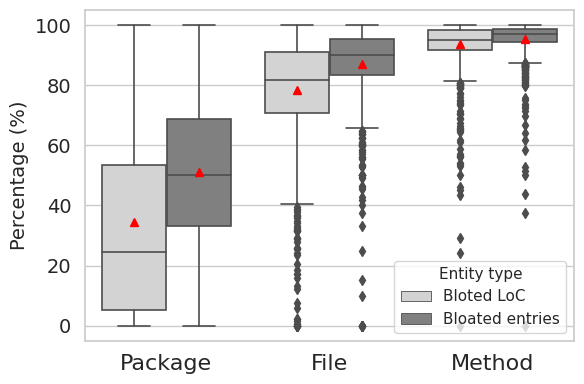

In [22]:
metrics_count = ['PBD', 'PBFD', 'PBMD']
metrics_loc = ['PBD-LOC', 'PBFD-LOC', 'PBMD-LOC']

rename_dict = {
    'PBMD': 'Method',
    'PBD': 'Package',
    'PBFD': 'File',
}

# Melt count metrics

df_count = df[metrics_count].melt(var_name='metric', value_name='value')
df_count['Type'] = 'Bloated entries'

# Melt loc metrics
df_loc = df[metrics_loc].melt(var_name='metric', value_name='value')
df_loc['Type'] = 'Bloted LoC'

# Replace '-LOC' from metric names in loc df
df_loc['metric'] = df_loc['metric'].str.replace('-LOC', '')

# Combine the two melted dataframes
df_melted = pd.concat([df_count, df_loc])

df_melted['metric'] = df_melted['metric'].map(rename_dict)
df_melted['Type'] = pd.Categorical(df_melted['Type'], categories=['Bloted LoC', 'Bloated entries'], ordered=True)

# ax = sns.violinplot(data=df_melted, x="value", y="metric", hue="Type", palette=['blue', 'orange'], split=False,  orient = 'h', inner="box")
ax = sns.boxplot(data=df_melted, x="metric", y="value", hue="Type", 
            orient='v', linewidth=1.2,  palette=['lightgrey', 'grey'],
            showmeans=True,
            meanprops={"marker":"^","markerfacecolor":"red", "markeredgecolor":"red"}) 
# sns.violinplot(data=df_melted, x="value", y="metric", hue="Type", palette=['blue', 'orange'], split=False,  orient = 'h', inner=None, saturation=0.7)

# plt.title("Bloated Entities Analysis", fontsize=18)
ax.legend( title="Entity type", frameon=True, fontsize=11, title_fontsize=11)

plt.xlabel("")
plt.ylabel("Percentage (%)", fontsize=14)
plt.tight_layout()
plt.savefig('figures/rq1_new.pdf',  bbox_inches='tight',)
plt.show()



In [23]:
df_count

,metric,value,Type
0,PBD,30.00,Bloated entries
1,PBD,0.00,Bloated entries
2,PBD,42.86,Bloated entries
3,PBD,46.15,Bloated entries
4,PBD,44.83,Bloated entries
...,...,...,...
3673,PBMD,100.00,Bloated entries
3674,PBMD,88.79,Bloated entries
3675,PBMD,96.04,Bloated entries
3676,PBMD,89.02,Bloated entries


In [24]:
df["NBD"].sum()

10930

In [27]:
total_unique_unresolved = df["unique_unresolved_count"].sum()
total_unique_resolved = df["unique_resolved_count"].sum()
total_unresolved = df["unresolved_count"].sum()
total_resolved = df["resolved_count"].sum()

total_unique = total_unique_unresolved + total_unique_resolved
total_all = total_unresolved + total_resolved

avg_unique_unresolved = total_unique_unresolved / len(df)
avg_unique_resolved = total_unique_resolved / len(df)
avg_unresolved = total_unresolved / len(df)
avg_resolved = total_resolved / len(df)


avg_unique_total = avg_unique_unresolved + avg_unique_resolved
avg_total = avg_unresolved + avg_resolved

In [28]:
(total_unique_unresolved, total_unique_resolved, total_unresolved, total_resolved, total_unique, total_all, avg_unique_unresolved, avg_unique_resolved, avg_unresolved, avg_resolved, avg_unique_total, avg_total)


(198732,
 6319676,
 4819066,
 34095934,
 6518408,
 38915000,
 162.0978792822186,
 5154.711256117455,
 3930.7226753670475,
 27810.712887438825,
 5316.809135399674,
 31741.435562805873)

In [35]:
df.describe()

,NBD,NBFD,NBMD,NBD-LOC,NBFD-LOC,PBD,PBFD,PBMD,PBD-LOC,PBFD-LOC,PBMD-LOC,unique_unresolved_count,unique_resolved_count,unresolved_count,resolved_count
count,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00,1226.00
mean,8.92,602.02,9141.64,84710.87,208095.03,51.02,87.20,95.40,34.47,78.55,93.57,162.10,5154.71,3930.72,27810.71
std,12.85,785.95,11308.74,161512.62,286678.55,28.10,13.28,6.22,32.67,18.20,7.99,976.83,17610.98,9954.20,80906.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,86.00,1393.25,4365.00,30977.00,33.33,83.33,94.24,5.35,70.69,91.57,1.00,36.25,13.00,50.00
50%,4.00,302.50,4933.50,20161.50,108300.50,50.00,90.00,96.90,24.65,81.69,95.18,10.00,124.50,94.50,247.50
75%,11.00,879.00,12552.50,94492.25,288986.00,68.71,95.20,98.76,53.30,91.12,98.44,50.75,727.50,760.00,2463.75
max,139.00,8390.00,99702.00,1452702.00,2567201.00,100.00,100.00,100.00,100.00,100.00,100.00,28637.00,187140.00,93895.00,732560.00
